In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import random
import gc
import h5py

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
d = np.loadtxt('H_function_20_over.dat')

In [3]:
d

array([[ 0.00000e+00,  0.00000e+00],
       [ 1.00000e-04,  3.10148e-05],
       [ 2.00000e-04,  6.20362e-05],
       ...,
       [ 5.89980e+00, -7.51049e-05],
       [ 5.89990e+00, -3.89075e-05],
       [ 5.90000e+00, -2.69321e-06]])

In [13]:
H_function = np.zeros(int(d.size/2))
inverse_H_function = np.zeros(int(d.size/2))
time_index = np.zeros(int(d.size/2))


for i in range(int(d.size/2)):
    H_function[i] = d[i, 1]
    inverse_H_function[i] = d[int(d.size/2)-i-1, 1]
    time_index[i] = (d[i, 0]/5.9)*(2*math.pi) - math.pi

In [14]:
gamma_a = (H_function - inverse_H_function)/2.

<Figure size 432x288 with 0 Axes>

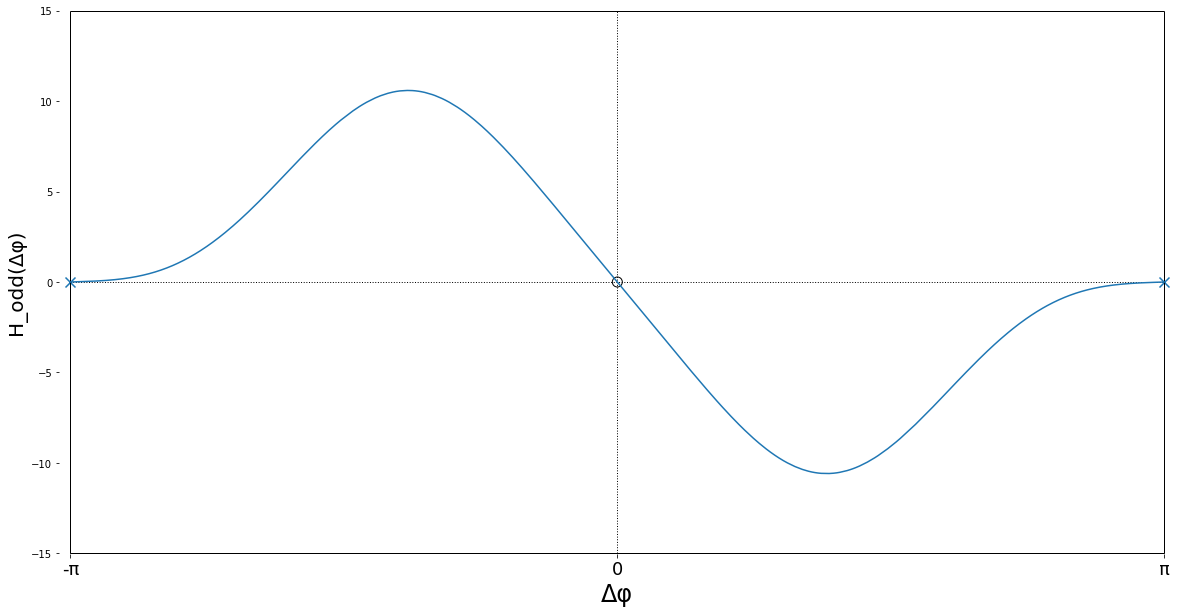

In [32]:
pp = PdfPages('phase_diff_normalized_H_odd.pdf')
plt.clf()
fig = plt.figure(figsize=(20,10))
plt.plot(time_index, gamma_a)
plt.scatter([0],[0], s=100, facecolor="None",edgecolors="black")
plt.scatter([-np.pi, np.pi], [0, 0], marker="x", s=100)

plt.xlabel('Δφ', fontsize=24)
plt.ylabel('H_odd(Δφ)', fontsize=20)

plt.xlim(xmin=-np.pi*1.02, xmax=np.pi*1.02)
plt.ylim(ymin=-15.02,ymax=15.02)

ax = plt.gca()
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["top"].set_color("None")
ax.spines["bottom"].set_color("None")

xticks = np.array(["-π", "0", "π"])
locs=np.linspace(-np.pi,np.pi,3)
plt.xticks(locs, xticks, fontsize=18)
plt.vlines(np.linspace(-np.pi,np.pi,3),-15,15,linestyle=":",lw=1)
plt.vlines(np.linspace(-np.pi,np.pi,2),-15,15,linestyle="-",lw=1)
plt.hlines([0], -np.pi, np.pi,linestyle=":",lw=1)
plt.hlines([-15,15], -np.pi, np.pi,linestyle="-",lw=1)

plt.show()
pp.savefig(fig)
pp.close()

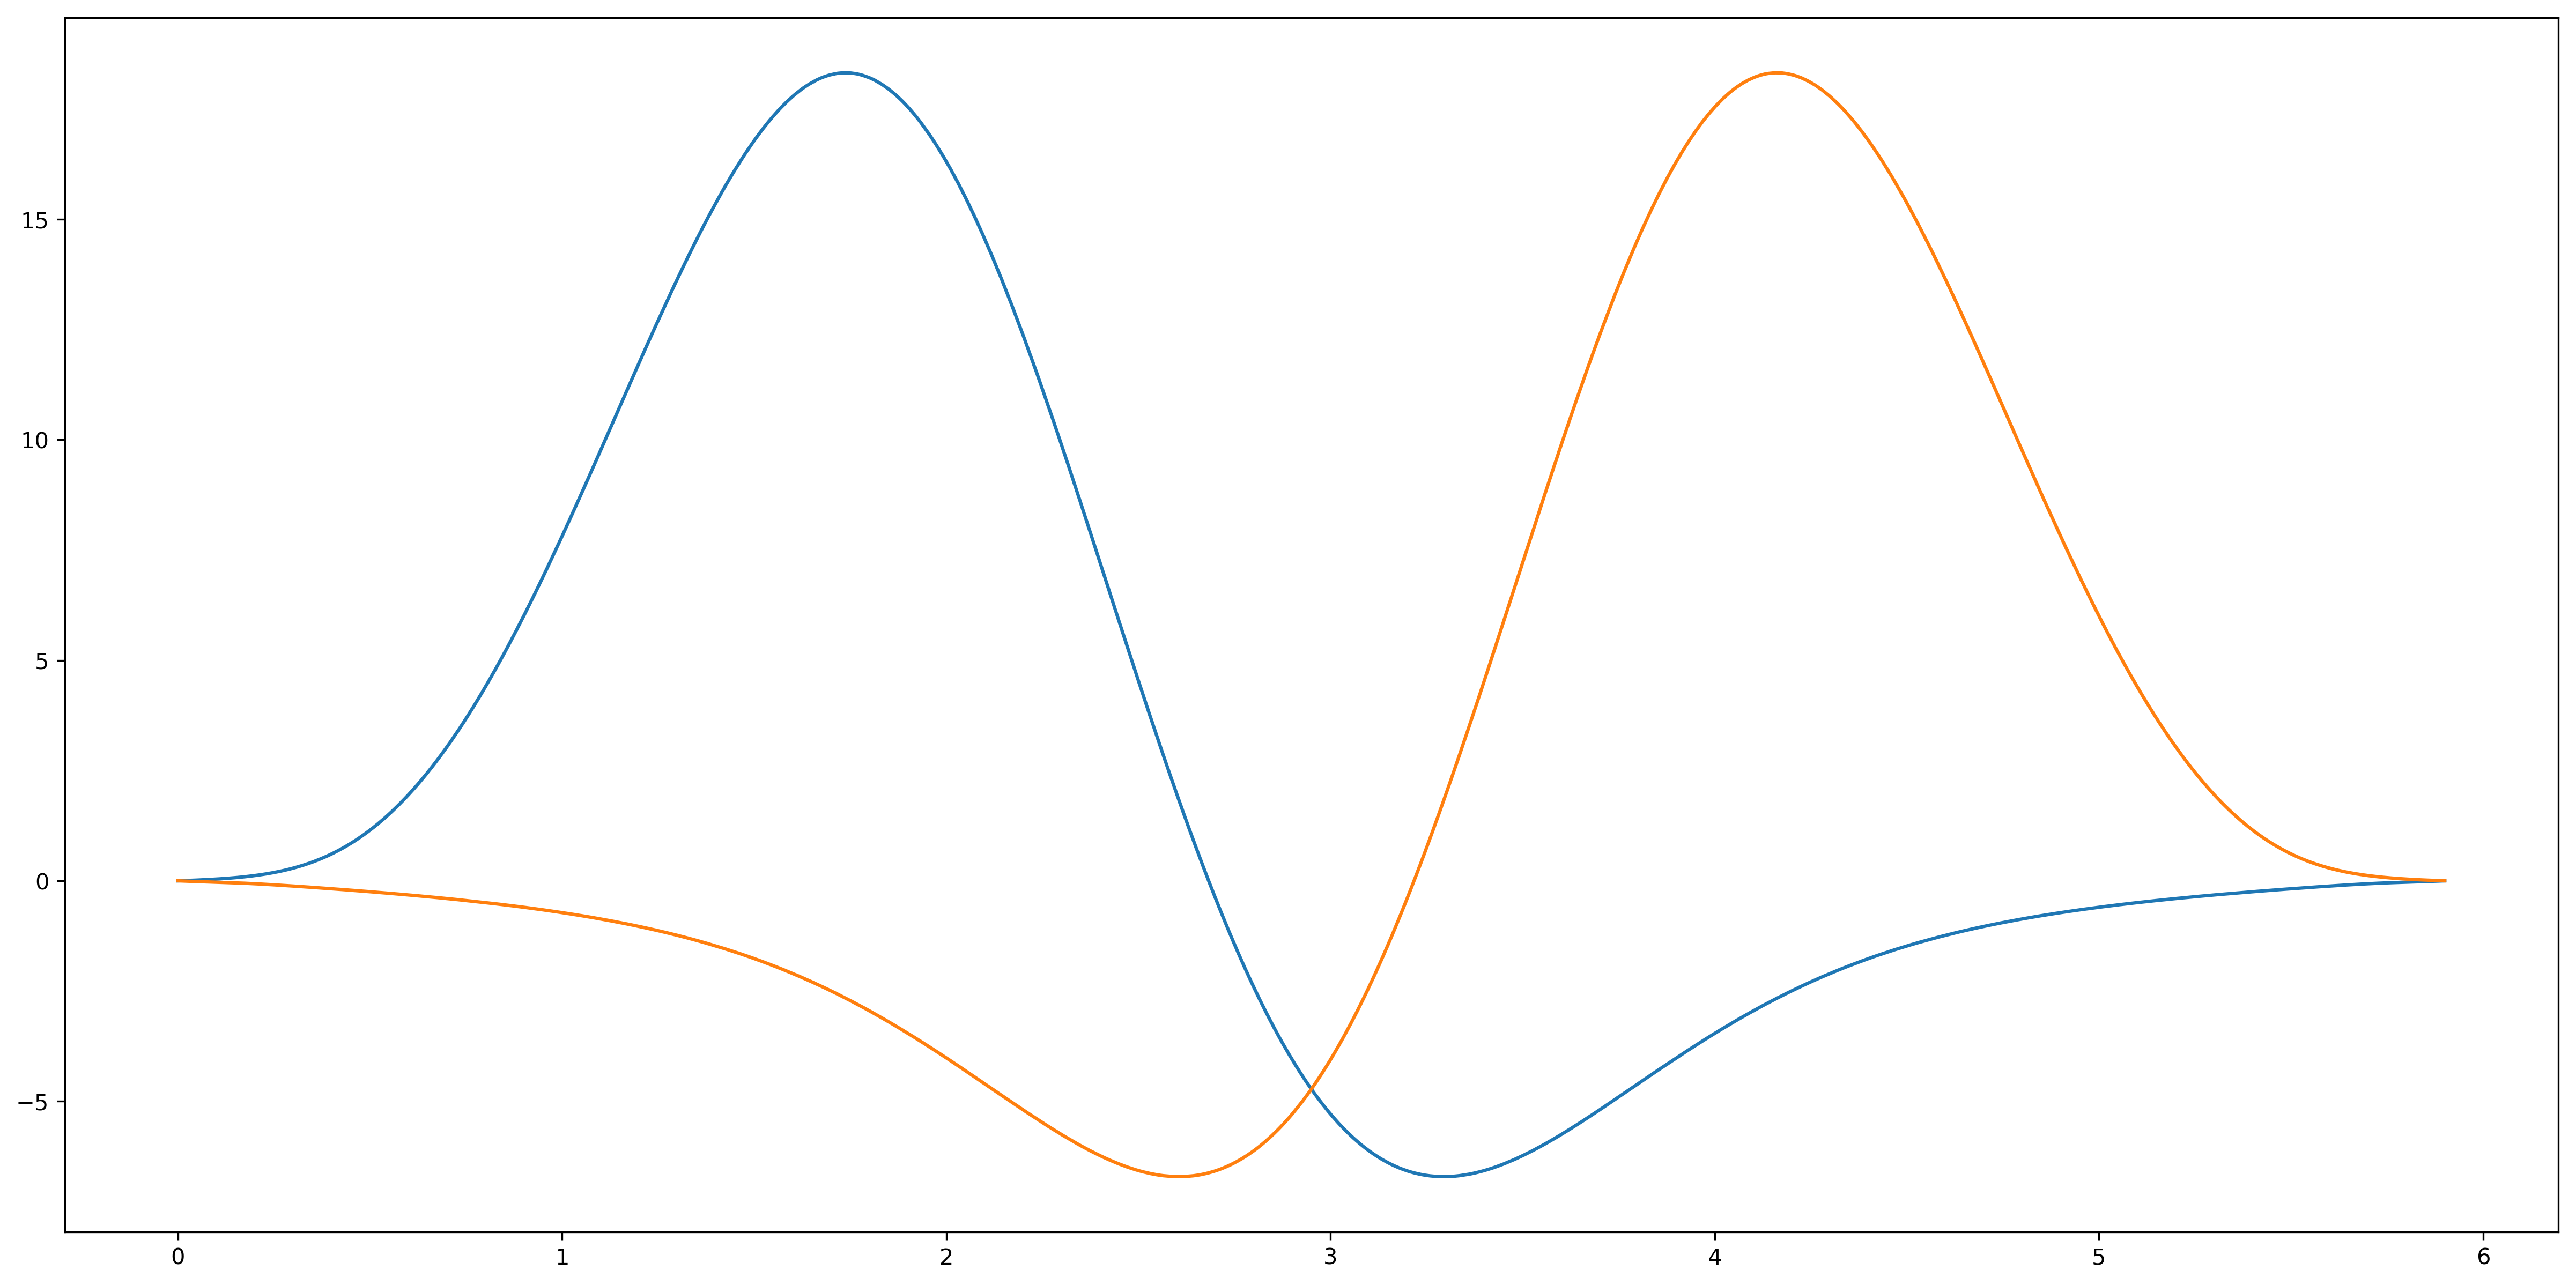

In [26]:
plt.clf()
fig = plt.figure(figsize=(20,10), dpi = 300)
plt.plot(time_index, H_function)
plt.plot(time_index, inverse_H_function)
plt.show()